<a href="https://colab.research.google.com/github/serahtouati/TSP_Projet/blob/main/Notebook/TSP_Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Génération des villes et calcul des distances


## 1. Importation du fichier csv contenant les villes

In [ ]:
import pandas as pd

# Charger les villes depuis GitHub
url = "https://github.com/serahtouati/TSP_Projet/raw/main/data/fr.csv"
cities = pd.read_csv(url)
cities.head()


,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Paris,48.8567,2.3522,France,FR,Île-de-France,primary,11060000,2148271
1,Bordeaux,44.8400,-0.5800,France,FR,Nouvelle-Aquitaine,admin,994920,994920
2,Marseille,43.2964,5.3700,France,FR,Provence-Alpes-Côte d’Azur,admin,873076,873076
3,Lyon,45.7600,4.8400,France,FR,Auvergne-Rhône-Alpes,admin,522250,522250
4,Toulouse,43.6045,1.4440,France,FR,Occitanie,admin,504078,504078


##2. Création des listes de villes

In [ ]:
def load_cities_from_csv(url, n=20):
    # Charger le fichier CSV depuis le lien
    cities_csv = pd.read_csv(url)

    # Extraire les colonnes nécessaires (nom, latitude, longitude)
    cities = cities_csv[['city', 'lat', 'lng']].head(n).values.tolist()

    # Transformer en une liste de tuples (nom, lat, lng)
    cities = [(name, lat, lng) for name, lat, lng in cities]

    return cities

# Utilisation
cities_list = load_cities_from_csv(url, n=20)
print(cities_list)


[('Paris', 48.8567, 2.3522), ('Bordeaux', 44.84, -0.58), ('Marseille', 43.2964, 5.37), ('Lyon', 45.76, 4.84), ('Toulouse', 43.6045, 1.444), ('Nice', 43.7034, 7.2663), ('Nantes', 47.2181, -1.5528), ('Montpellier', 43.6119, 3.8772), ('Strasbourg', 48.5833, 7.7458), ('Lille', 50.6278, 3.0583), ('Rennes', 48.1147, -1.6794), ('Toulon', 43.1258, 5.9306), ('Reims', 49.2628, 4.0347), ('Saint-Étienne', 45.4347, 4.3903), ('Le Havre', 49.49, 0.1), ('Dijon', 47.3167, 5.0167), ('Grenoble', 45.1715, 5.7224), ('Angers', 47.4736, -0.5542), ('Villeurbanne', 45.7667, 4.8803), ('Nîmes', 43.8383, 4.3597)]


##3. Calcul des distances entre les villes

In [ ]:
import math

def calculate_distance_matrix(cities):
    n = len(cities)
    matrix = [[0.0] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            if i != j:
                # Coordonnées des villes
                lat1, lon1 = cities[i][1], cities[i][2]
                lat2, lon2 = cities[j][1], cities[j][2]

                # Calcul de la distance avec la formule de Haversine
                rayon = 6371  # Rayon de la Terre en km
                dlat = math.radians(lat2 - lat1)
                dlon = math.radians(lon2 - lon1)
                a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
                c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
                distance = rayon * c
                matrix[i][j] = distance

    return matrix

# Utilisation
distance_matrix = calculate_distance_matrix(cities_list)

# Afficher un extrait de la matrice
import numpy as np
np.set_printoptions(precision=2)
np.array(distance_matrix)[:5, :5]  # Les 5 premières lignes et colonnes


array([[  0.  , 499.11, 660.5 , 392.06, 588.17],
       [499.11,   0.  , 505.26, 435.99, 211.85],
       [660.5 , 505.26,   0.  , 277.14, 318.74],
       [392.06, 435.99, 277.14,   0.  , 359.85],
       [588.17, 211.85, 318.74, 359.85,   0.  ]])

# II. Heuristiques

## 1. a. Heuristique du Plus Proche Voisin

In [ ]:
def nearest_neighbor(distance_matrix):

    n = len(distance_matrix)
    visited = [False] * n
    path = [0]
    visited[0] = True
    current_city = 0

    for _ in range(n - 1):
        nearest = None
        min_dist = float('inf')
        for city in range(n):
            if not visited[city] and distance_matrix[current_city][city] < min_dist:
                nearest = city
                min_dist = distance_matrix[current_city][city]
        path.append(nearest)
        visited[nearest] = True
        current_city = nearest

    path.append(0)
    return path

# Test
path_nn = nearest_neighbor(distance_matrix)
print("Chemin trouvé :", path_nn)

# Calcul de la distance totale
def calculate_total_distance(path, distance_matrix):
    return sum(
        distance_matrix[path[i]][path[i + 1]] for i in range(len(path) - 1)
    )

total_distance_nn = calculate_total_distance(path_nn, distance_matrix)
print(f"Distance totale parcourue (Nearest Neighbor) : {total_distance_nn:.2f} km")


Chemin trouvé : [0, 12, 9, 14, 10, 6, 17, 1, 4, 7, 19, 2, 11, 5, 16, 18, 3, 13, 15, 8, 0]
Distance totale parcourue (Nearest Neighbor) : 3157.88 km


## b. Visualisation de l'Heuristique du Plus Proche Voisin

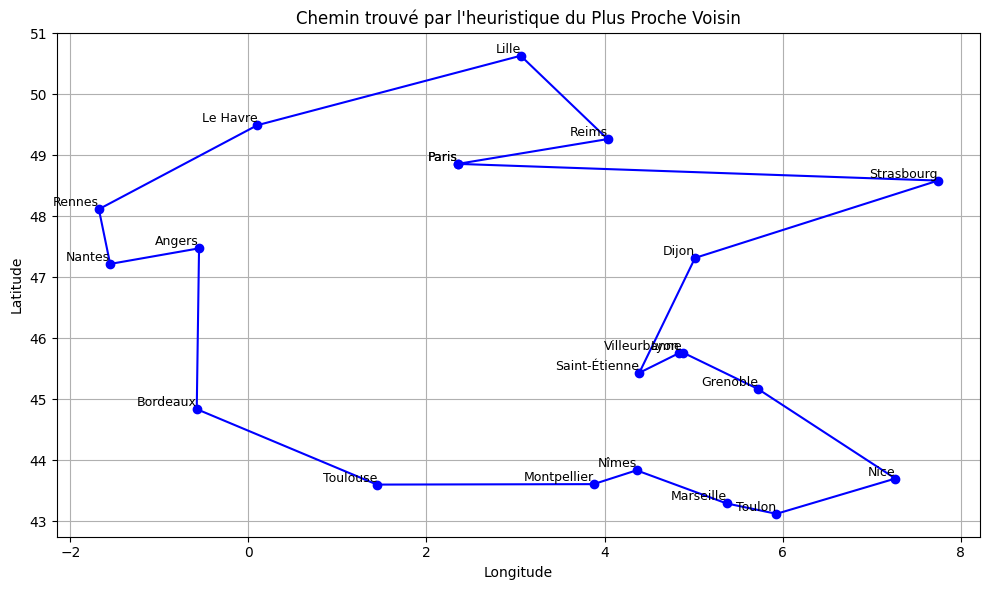

In [ ]:
import matplotlib.pyplot as plt

def plot_path(cities, path, title="Chemin trouvé par l'heuristique du Plus Proche Voisin"):
    plt.figure(figsize=(10, 6))

    # Extraire les coordonnées des villes dans l'ordre du chemin
    latitudes = [cities[i][1] for i in path]
    longitudes = [cities[i][2] for i in path]
    names = [cities[i][0] for i in path]

    # Tracer les lignes reliant les villes dans l’ordre du chemin
    plt.plot(longitudes, latitudes, marker='o', linestyle='-', color='blue')

    # Afficher les noms des villes
    for i, name in enumerate(names):
        plt.text(longitudes[i], latitudes[i], name, fontsize=9, ha='right', va='bottom')

    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_path(cities_list, path_nn)

## 2.a. Heuristique 2-opt


In [ ]:
def two_opt(path, distance_matrix):
    n = len(path)
    improvement = True

    while improvement:
        improvement = False
        for i in range(1, n - 2):
            for j in range(i + 1, n - 1):
                a, b = path[i - 1], path[i]
                c, d = path[j], path[j + 1]
                dist_before = distance_matrix[a][b] + distance_matrix[c][d]
                dist_after = distance_matrix[a][c] + distance_matrix[b][d]

                if dist_after < dist_before:
                    path[i:j + 1] = reversed(path[i:j + 1])
                    improvement = True

    return path

# Test de l'heuristique 2-opt
path_2opt = two_opt(path_nn.copy(), distance_matrix)
print("Chemin trouvé après 2-opt :", path_2opt)

# Calcul de la distance totale
total_distance_2opt = calculate_total_distance(path_2opt, distance_matrix)
print(f"Distance totale parcourue (2-opt) : {total_distance_2opt:.2f} km")


Chemin trouvé après 2-opt : [0, 14, 10, 17, 6, 1, 4, 7, 19, 2, 11, 5, 16, 13, 3, 18, 15, 8, 12, 9, 0]
Distance totale parcourue (2-opt) : 3012.39 km


## b. Visualisation de l'Heuristique 2-opt

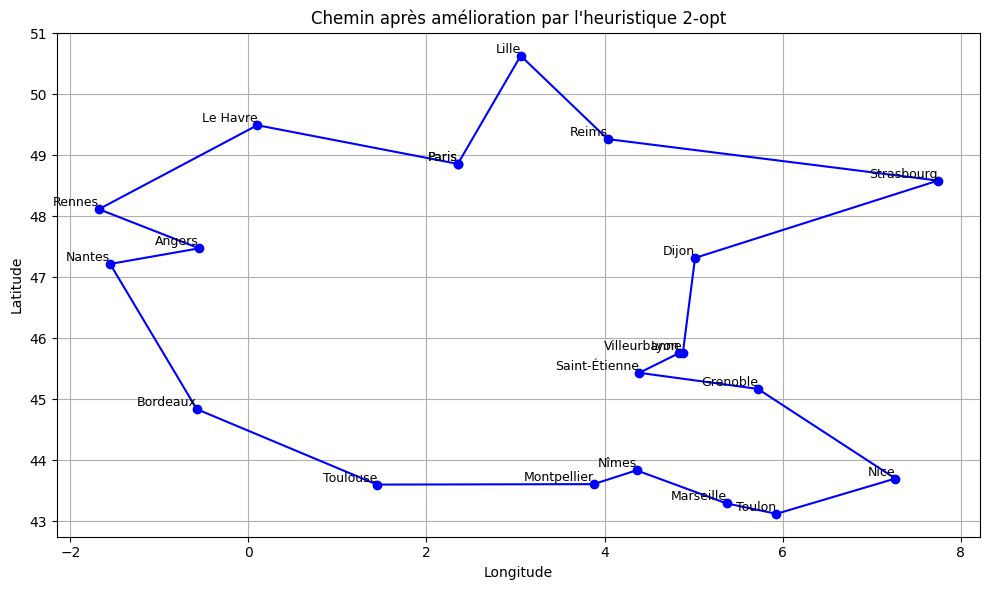

In [ ]:
plot_path(cities_list, path_2opt, title="Chemin après amélioration par l'heuristique 2-opt")

## 3.a. Heuristique Algorithme Génétique

In [ ]:
import random

# Générer une population initiale
def initial_population(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        individual = list(range(1, num_cities))
        random.shuffle(individual)
        individual = [0] + individual + [0]
        population.append(individual)
    return population

# Fonction de fitness : distance totale du chemin
def fitness(individual, distance_matrix):
    return calculate_total_distance(individual, distance_matrix)

# Sélection : tournoi
def selection(population, distance_matrix, k=3):
    selected = random.sample(population, k)
    selected.sort(key=lambda ind: fitness(ind, distance_matrix))
    return selected[0]

# Order Crossover (OX)
def order_crossover(parent1, parent2):
    start, end = sorted(random.sample(range(1, len(parent1) - 1), 2))

    child = [None] * len(parent1)
    child[0] = 0
    child[-1] = 0

    # Copie de la portion du parent 1
    child[start:end] = parent1[start:end]

    # Compléter avec les villes restantes du parent 2
    p2_part = [city for city in parent2[1:-1] if city not in child]
    pointer = 1
    for city in p2_part:
        while child[pointer] is not None:
            pointer += 1
        child[pointer] = city

    return child

# Mutation : échange de deux villes (sauf la première et la dernière)
def mutate(individual, mutation_rate=0.1):
    if random.random() < mutation_rate:
        i, j = sorted(random.sample(range(1, len(individual) - 1), 2))
        individual[i], individual[j] = individual[j], individual[i]
    return individual

# Algorithme génétique complet
def genetic_algorithm(distance_matrix, pop_size=100, generations=500, mutation_rate=0.1):
    num_cities = len(distance_matrix)
    population = initial_population(pop_size, num_cities)

    best_solution = min(population, key=lambda ind: fitness(ind, distance_matrix))
    best_distance = fitness(best_solution, distance_matrix)

    for gen in range(generations):
        new_population = []
        for _ in range(pop_size):
            parent1 = selection(population, distance_matrix)
            parent2 = selection(population, distance_matrix)
            child = order_crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            new_population.append(child)

        population = new_population

        current_best = min(population, key=lambda ind: fitness(ind, distance_matrix))
        current_distance = fitness(current_best, distance_matrix)

        if current_distance < best_distance:
            best_solution = current_best
            best_distance = current_distance

    return best_solution, best_distance

# Lancer l'algorithme
best_path_genetic, total_distance_genetic = genetic_algorithm(distance_matrix, pop_size=100, generations=500, mutation_rate=0.1)

print("Chemin trouvé par l'algorithme génétique :", best_path_genetic)
print(f"Distance totale parcourue (Algorithme génétique) : {total_distance_genetic:.2f} km")

Chemin trouvé par l'algorithme génétique : [0, 18, 3, 13, 16, 5, 11, 2, 19, 7, 4, 1, 6, 17, 10, 14, 9, 12, 8, 15, 0]
Distance totale parcourue (Algorithme génétique) : 3358.84 km


## b. Visualisation de l'heuristique de l'Algorithme Génétique

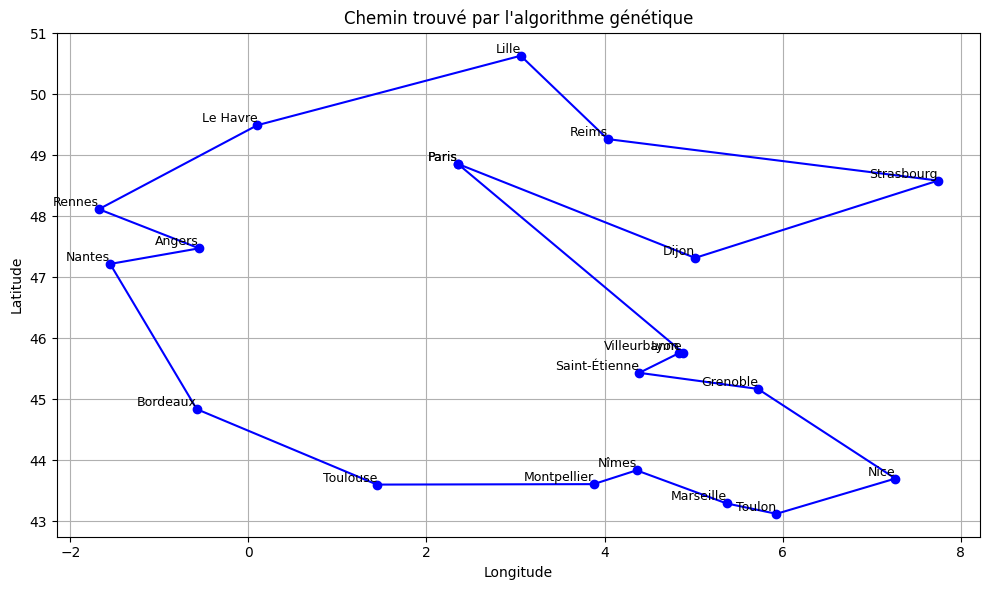

In [ ]:
plot_path(cities_list, best_path_genetic, title="Chemin trouvé par l'algorithme génétique")